[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW6.ipynb)

**Problem 1** One of the earliest uses of regression was by Francis Galton who studied genetics. He used regression to predict children's heights based on the heights of their parents. There is an interesting story about it here: https://www.newyorker.com/magazine/2005/01/24/measure-for-measure-5. The following chunk loads in Galton's real data set that he used to determine the relationship between children's and parents heights.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
# Run next line if in colab. Or run if need to install library
%pip install pydataset

import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
heights = pd.DataFrame(data("GaltonFamilies"))
heights

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 81.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939415 sha256=405359d2f1123f6e5344344b038664d0c28c8c8d97ce45323700dc1e66ba6c7d
  Stored in directory: /root/.cache/pip/wheels/4c/82/ad/f04abc617222b10438b1285ab9b5cfaecd180c10a7c81cff54
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


,family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,001,78.5,67.0,75.43,4,1,male,73.2
2,001,78.5,67.0,75.43,4,2,female,69.2
3,001,78.5,67.0,75.43,4,3,female,69.0
4,001,78.5,67.0,75.43,4,4,female,69.0
5,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
930,203,62.0,66.0,66.64,3,1,male,64.0
931,203,62.0,66.0,66.64,3,2,female,62.0
932,203,62.0,66.0,66.64,3,3,female,61.0
933,204,62.5,63.0,65.27,2,1,male,66.5


Part a. Explore the relationship between the target variable, childHeight, and the parents heights. Do not split by gender.

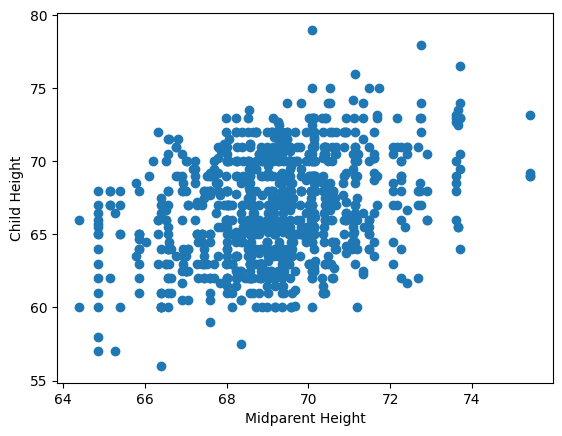

In [3]:
plt.scatter(heights.midparentHeight, heights.childHeight)
plt.xlabel("Midparent Height")
plt.ylabel("Child Height")
plt.show()

Part b. Explore the relationship again, this time splitting the data set by gender. In other words, repeat part a, but separately for males and females.

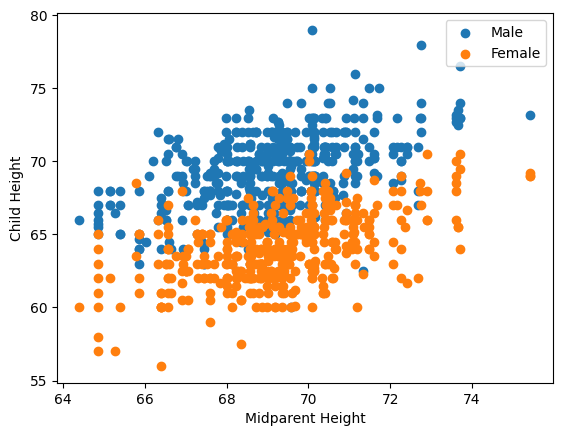

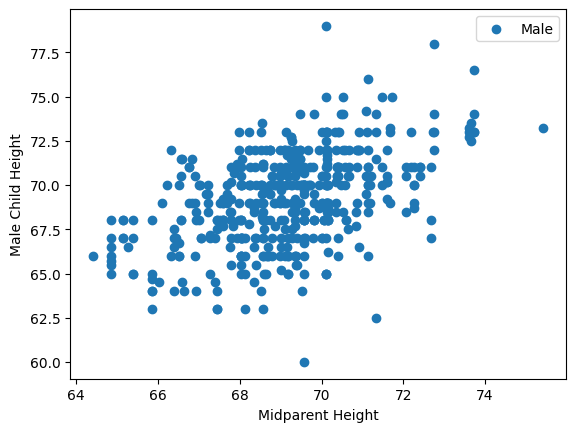

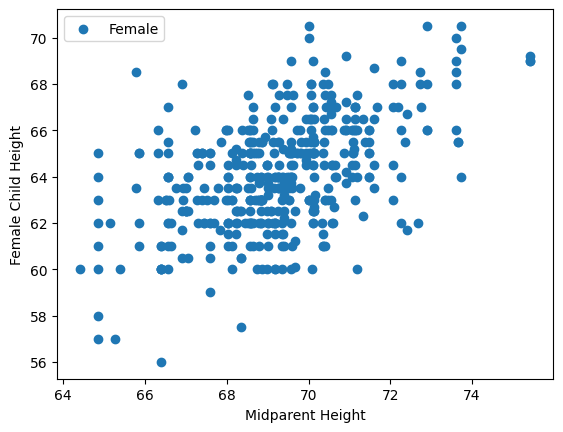

In [4]:
heights_female = heights[heights.gender == "female"]
heights_male = heights[heights.gender == "male"]
plt.scatter(heights_male.midparentHeight, heights_male.childHeight, label="Male")
plt.scatter(heights_female.midparentHeight, heights_female.childHeight, label="Female")
plt.xlabel("Midparent Height")
plt.ylabel("Child Height")
plt.legend()
plt.show()

plt.scatter(heights_male.midparentHeight, heights_male.childHeight, label="Male")
plt.xlabel("Midparent Height")
plt.ylabel("Male Child Height")
plt.legend()
plt.show()

plt.scatter(heights_female.midparentHeight, heights_female.childHeight, label="Female")
plt.xlabel("Midparent Height")
plt.ylabel("Female Child Height")
plt.legend()
plt.show()


Part c. Why is separating by gender important for understanding the relationship between child's and parent's heights?

Men, on average, will have a taller height than women. Because of that, you cannot throw them into the same group, as it could incorrectly skew the female heights too high, or the male heights too low, causing confounding.

**Problem 2**: Continuing with Galton's height data, fit a linear regression model using midparentHeight and gender as variables.

Part a. Write the code to fit the model.

In [10]:
x = heights[['midparentHeight', 'gender']]
x = pd.get_dummies(x, drop_first=True)
y = heights['childHeight']

x



,midparentHeight,gender_male
1,75.43,True
2,75.43,False
3,75.43,False
4,75.43,False
5,73.66,True
...,...,...
930,66.64,True
931,66.64,False
932,66.64,False
933,65.27,True


In [11]:
reg = LinearRegression()
reg_fit = reg.fit(x, y)
print('intercept:', reg_fit.intercept_)
dict(zip(x.columns,reg_fit.coef_))

intercept: 16.514102197606263


{'midparentHeight': np.float64(0.6870152119086935),
 'gender_male': np.float64(5.2151054073866945)}

Part b. To include gender as a variable in the model, you needed to create a dummy variable. What is the base level for the variable you created.

If the unused dummy variable becomes the "base level," then gender_female is my base level.

Part c. Interpret both coefficients in the model you created in the context of the problem.

MidParentHeight: Assuming all else held constant, for every extra inch that both parents gain, bringing MidParentHeight up by one, the child's height is expected to increase by .68 inches.

Gender: Assuming all else held constant, if the child is a male, their height is expected to increase by 5.21 inches when compared to a female with the same MidParentHeight.

**Problem 3** Write code to fit a regression tree for the data.

Part a. Write code to fit the model with a max depth of 3.

In [15]:
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(x, y)

DecisionTreeRegressor(max_depth=3)

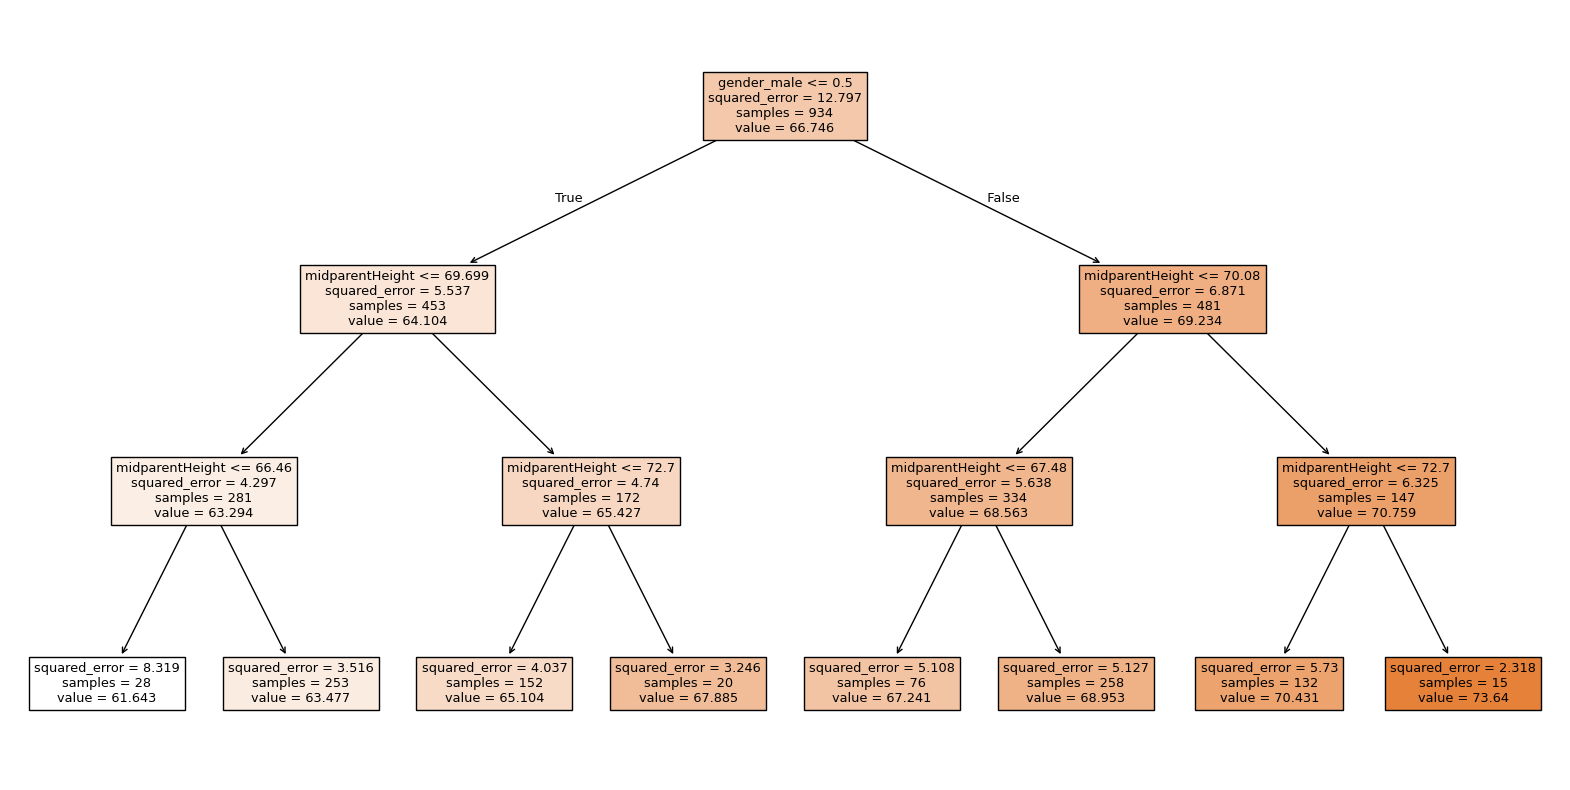

In [16]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=x.columns, filled=True)
plt.show()

Part b. Find any split based on gender. Describe what those splits mean?

The initial split for the chart is based on gender, essentially splitting each side into a tree for that specific gender. Gender explains the largest reduction in variance.

**Problem 4**: Insurance companies will use individual characteristics to predict how much an individual will cost in order to reserve enough money on hand to cover expenses. The data set we will use is from Kaggle. You can find it at: https://www.kaggle.com/datasets/mirichoi0218/insurance

The full data set you get from kaggle you can get into Python using

insurance_all = pd.read_csv("https://richardson.byu.edu/220/insurance_all.csv")

Use this dataset to answer the remainder of the questions on the homework.

In [18]:
insurance_all = pd.read_csv("https://richardson.byu.edu/220/insurance_all.csv")
insurance_all

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Part a. For each variable in the data set, list if it is continuous or categorical. If categorical specify if it is binary or not and list each value it can have.

Age: Continuous

Sex: Categorical - Binary
* Female
* Male

BMI: Continuous

Children: Continuous(Discrete numeric variable, treated as continuous)

Smoker: Categorical - Binary
* Yes
* No

Region: Categorical

* Northeast
* Northwest
* Southeast
* Southwest

Charges: Continuous

Part b. Do an exploratory analysis of the data. charges is the target variable and the rest are predictors. Use figures to explore the relationship between the predictor variables in the data and charges.

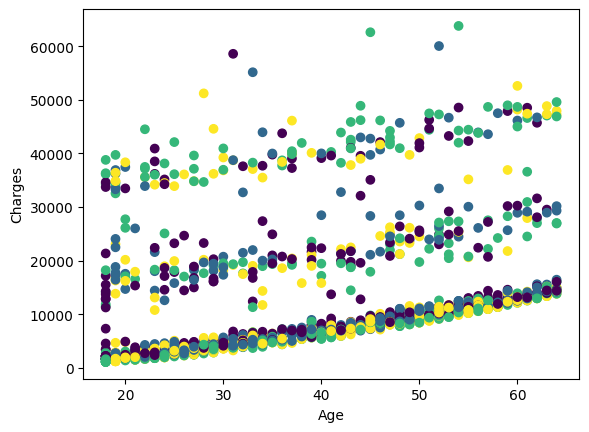

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
insurance_all['region_encoded'] = le.fit_transform(insurance_all['region'])

plt.scatter(insurance_all.age, insurance_all.charges, c=insurance_all.region_encoded, cmap="viridis")

plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

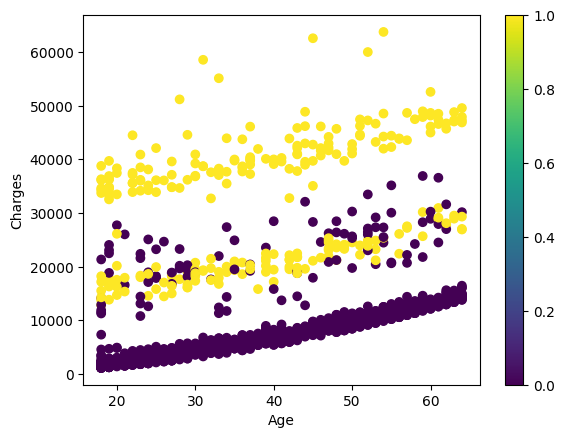

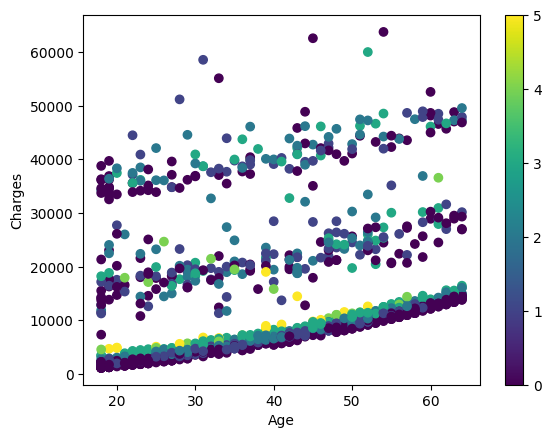

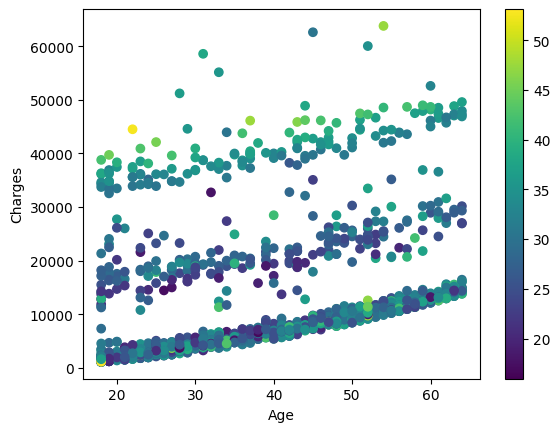

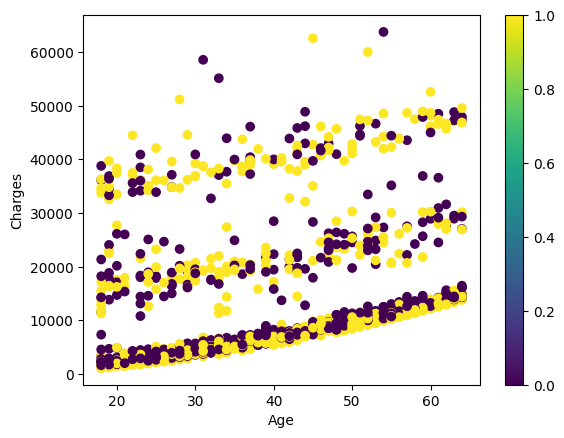

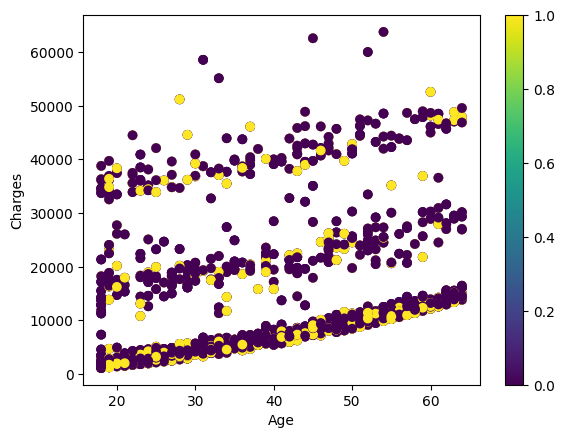

In [32]:
x = insurance_all[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
x = pd.get_dummies(x, drop_first=True)
y = insurance_all['charges']

plt.scatter(x.age, y, c=x.smoker_yes)
plt.colorbar()
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

plt.scatter(x.age, y, c=x.children)
plt.colorbar()
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

plt.scatter(x.age, y, c=x.bmi)
plt.colorbar()
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

plt.scatter(x.age, y, c=x.sex_male)
plt.colorbar()
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Part c. Write the code that fits a linear regression model to the data, predicting charges from the other variables.

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)
print('intercept:', lin_reg.intercept_)
dict(zip(x.columns,lin_reg.coef_))

intercept: -11938.538576167146


{'age': np.float64(256.85635253734864),
 'bmi': np.float64(339.1934536108373),
 'children': np.float64(475.5005451491264),
 'sex_male': np.float64(-131.31435939511314),
 'smoker_yes': np.float64(23848.534541912835),
 'region_northwest': np.float64(-352.96389942465464),
 'region_southeast': np.float64(-1035.022049387825),
 'region_southwest': np.float64(-960.0509913008366)}

Part d. For each categorical variable in the original data set, report what variables have been created to represent it in the data we use in the regression model. Report what the base level is for each categorical variable.

In [36]:
print("Dummy variables\n")
print("Sex: Male")
print("Smoker: Yes")
print("Region: Northwest, Southeast, Southwest\n")


print("Base levels\n")
print("Sex: Female")
print("Smoker: No")
print("Region: Northeast")

Dummy variables

Sex: Male
Smoker: Yes
Region: Northwest, Southeast, Southwest

Base levels

Sex: Female
Smoker: No
Region: Northeast


Part e. Explain how the effect of age is interpreted in the regression model.

As the age of the person increases, their insurances charges increase by $256.85, all else held constant.

Part f. Explain how the effect of smoking is interpreted in the regression model.

If a person smokes, their insurance charges increase by $23848.53, all else held constant.

Part g. Explain how the effect of region is interpreted in the regression model.

If a person lives in the northwest region, then their insurance charges decrease by $-352.96, all else held constant.

If they live in the southeast region, then their insurance charges decrease by $-1035.02, assuming all else held constant.

If they live in the southwest region, then their insurance charges decrease by $-960.05, assuming all else held constant.

Because the northeast region was dropped, it has a coefficient of 0, thus serving as a reference point for the other three region coefficients.

**Problem 5** Run the following code, which splits the outcome variable into high charges and low charges.

In [39]:
# targets from insurance['charges'] only
import pandas as pd
insurance_all = pd.read_csv("https://richardson.byu.edu/220/insurance_all.csv")

import numpy as np
import pandas as pd

m = insurance_all['charges'].median()
insurance_all['cost_bin2'] = np.where(insurance_all['charges'] <= m, 'low', 'high')

q33, q67 = insurance_all['charges'].quantile([0.33, 0.67]).values
insurance_all['cost_bin3'] = pd.cut(
    insurance_all['charges'],
    bins=[-np.inf, q33, q67, np.inf],
    labels=['low', 'med', 'high']
)


Part a. Fit a logistic regression model with `cost_bin2` as the target variable.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, insurance_all['cost_bin2'], test_size=0.2, random_state=42)

logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

print(logistic_reg.classes_)

y_pred = logistic_reg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

logisitic_reg_coef = dict(zip(x.columns,logistic_reg.coef_[0]))
logisitic_reg_coef

['high' 'low']
Accuracy: 0.9104477611940298
              precision    recall  f1-score   support

        high       0.88      0.93      0.90       122
         low       0.94      0.90      0.92       146

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'age': np.float64(-0.14701667880714642),
 'bmi': np.float64(-0.03244997998088882),
 'children': np.float64(-0.060781961523784706),
 'sex_male': np.float64(0.23248807728523585),
 'smoker_yes': np.float64(-6.1175449934697035),
 'region_northwest': np.float64(0.3299283065489078),
 'region_southeast': np.float64(0.5497746754457903),
 'region_southwest': np.float64(0.6567697746375316)}

Part b. Interpret the coefficient associated with `age`

My model is holding "low" as my positive outcome.

As the age of a person increases by one, the log-odds of being in the lower insurance group decreases by 0.147, holding all else constant.

Part c. Fit a classification tree for `cost_bin2` with a max depth of 3.

In [44]:
from sklearn.tree import DecisionTreeClassifier

classification_tree = DecisionTreeClassifier(max_depth=3)
classification_tree.fit(x, insurance_all['cost_bin2'])

DecisionTreeClassifier(max_depth=3)

Part d. Print the tree.

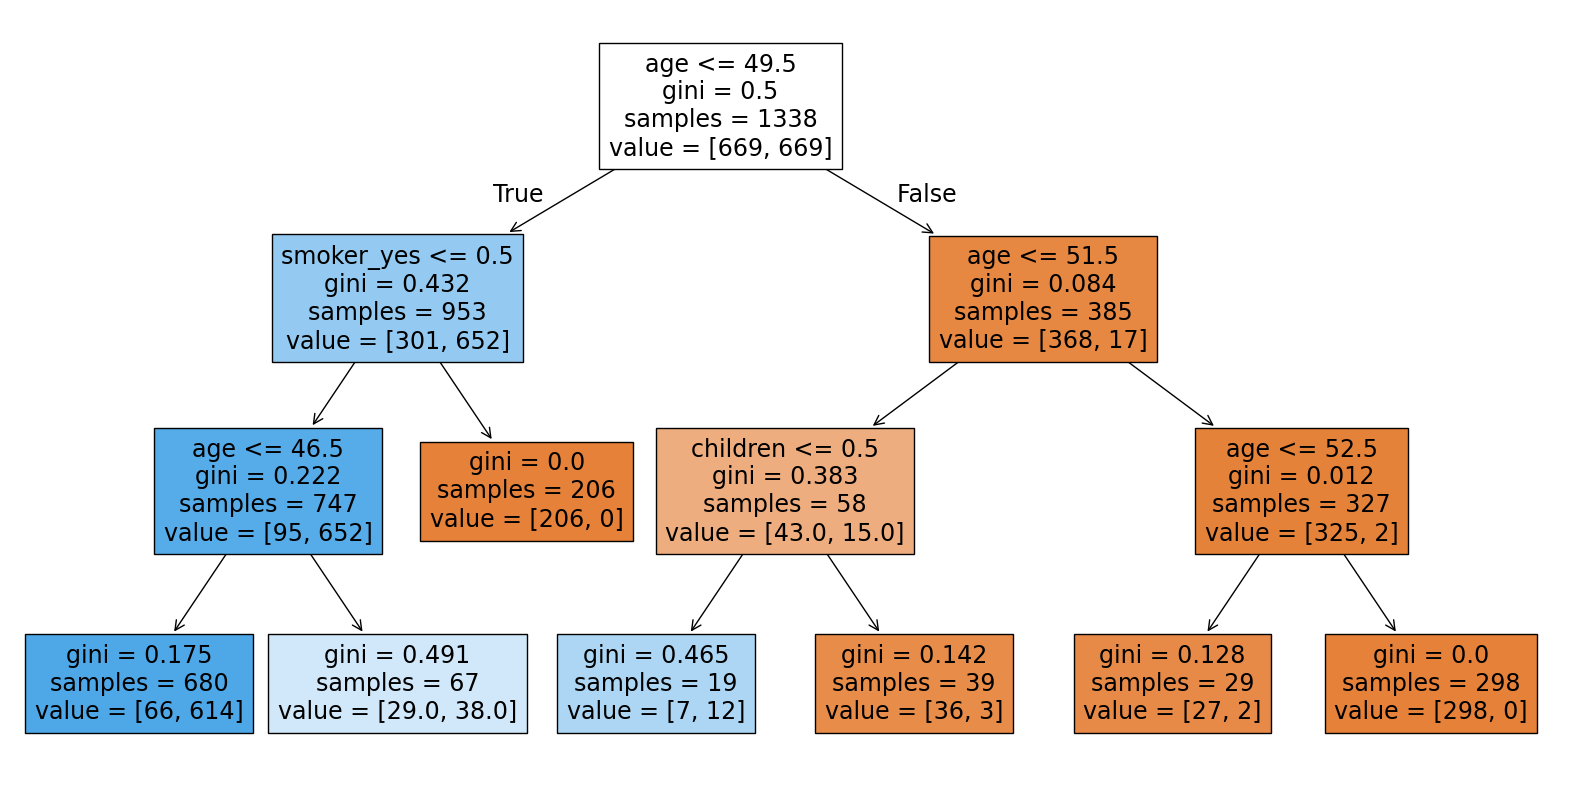

In [45]:
plt.figure(figsize=(20,10))
plot_tree(classification_tree, feature_names=x.columns, filled=True)
plt.show()

Part e. Fit a a classification tree for the target variable with 3 bins, called `cost_bin3` with a max depth of 3 and print the resulting tree.

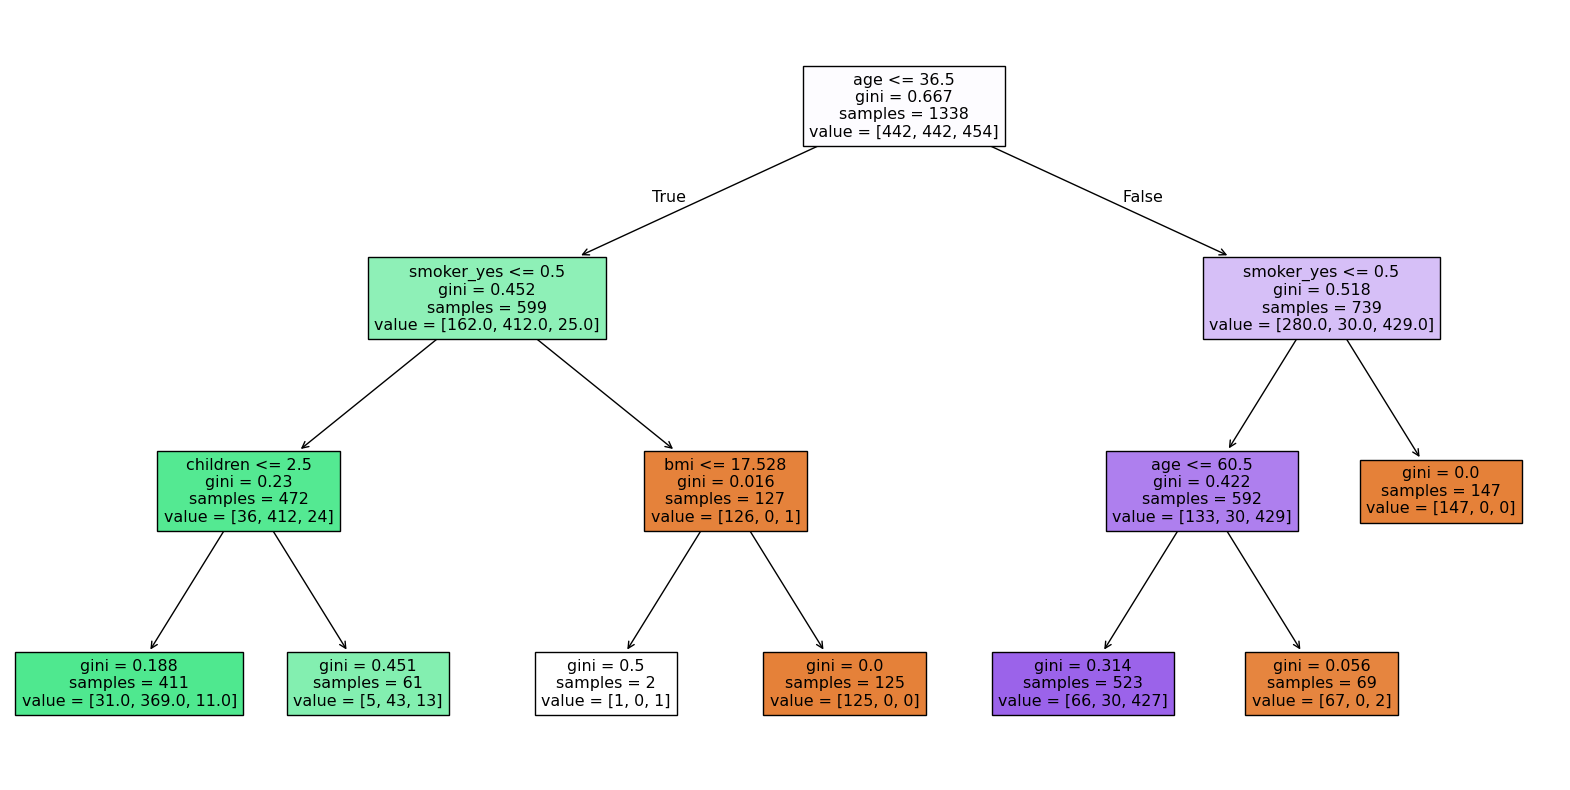

In [46]:
classification_tree = DecisionTreeClassifier(max_depth=3)
classification_tree.fit(x, insurance_all['cost_bin3'])

plt.figure(figsize=(20,10))
plot_tree(classification_tree, feature_names=x.columns, filled=True)
plt.show()